# Lab:  Model selection for basketball data

In this lab, you will apply polynomial regression with model order selection to a basketball dataset.

Before doing this lab, you should review the polynomial model selection demo.  In addition to the concepts in that demo, you will learn to:
* Fit a polynomial model for a given model order
* Select the model order via K-fold cross-validation and the one-standard-error rule.
  

## Loading the data

We first load the standard packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We now load the basketball dataset, which we can get from `openml`.

In [2]:
from sklearn.datasets import fetch_openml
basketball = fetch_openml(name="baskball", version=1)

Let's turn this dataset into a `pandas` dataframe for ease of handling, and examine the features.

In [3]:
import pandas as pd
df = pd.DataFrame(basketball.data)
df

,assists_per_minute,height,time_played,age
0,0.0888,201,36.02,28
1,0.1399,198,39.32,30
2,0.0747,198,38.80,26
3,0.0983,191,40.71,30
4,0.1276,196,38.40,28
...,...,...,...,...
91,0.1554,183,11.58,24
92,0.2282,185,10.08,24
93,0.1778,185,18.56,23
94,0.1863,185,11.81,23


In this lab, we will ignore `basketball.target` and instead investigate the relationship between age and time played.  For this purpose, create the feature vector `x` using the values in the `age` column using the `numpy.array` command.  Similarly, create the target vector `y` using the values in the `time_played` column.

In [4]:
# TODO
x = np.array(df.age)
y = np.array(df.time_played)


# Fitting Models with Different Orders
We will now fit the polynomial model to the data using order d = 1 and order d = 5, for illustration.

For this, we'll use the `polyfit` command of the `numpy.polynomial.polynomial` library.

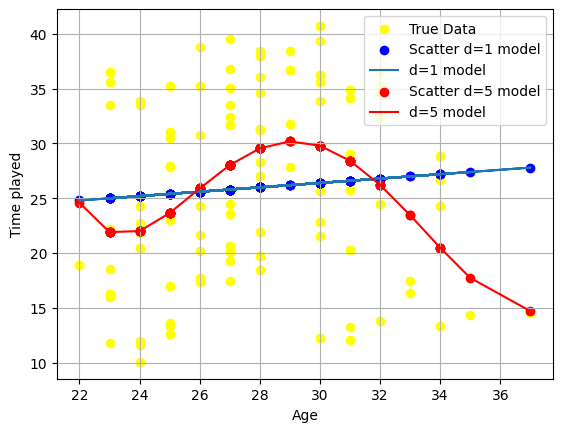

In [5]:
import numpy.polynomial.polynomial as poly
# TODO
d1 = 1
d2 = 5
beta1 = poly.polyfit(x,y,d1)
beta2 = poly.polyfit(x,y,d2)
xp = np.unique(x) # grid of feature values
yp_hat1 = poly.polyval(x,beta1) # target prediction on grid using polynomial order d1
yp_hat2= poly.polyval(x,beta2) # target prediction on grid using polynomial order d2

plt.scatter(x,y,label='True Data',c='yellow')
plt.scatter(x,yp_hat1,label='Scatter d=1 model',c='b')
plt.plot(x,yp_hat1,label='d=1 model')
plt.scatter(x,yp_hat2,label='Scatter d=5 model',c='red')

unique_values, indices = np.unique(x, return_index=True)

plt.plot(x[indices],yp_hat2[indices],label='d=5 model',c='red')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Time played')
plt.grid()
# Make a scatterplot and superimpose prediction curves for d1 and d2
# Add grid lines, axis labels, and a legend


How do these two model orders perform?  Are the results as expected? Can we do better?

## K-fold Cross-Validation

We now optimize the polynomial model order using 10-fold cross-validation (CV).  You can follow the method used in the polynomial demo.  The first step is to create a matrix of CV-MSE values over all hypothesized model orders and all splits.  Consider model orders between 0 and 7.

In [7]:
from sklearn import model_selection
# TODO
#Create a k-fold object
k = 10
kfo = model_selection.KFold(n_splits=k,shuffle=True)
#Try model orders d between 0 and 7
dtest = np.arange(0,7)
nd = len(dtest)
MSEcv = np.zeros((nd,k))
#Loop over the folds
    #Get the training data in the split
    #Loop over the model order
        #Fit data on training folds
        #Measure MSE on test fold
        #MSEcv[it,itsplit] =
for isplit, ind in enumerate(kfo.split(x)):

  Itr, Its = ind
  xtrain = x[Itr]
  ytrain = y[Itr]
  xtest = x[Its]
  ytest = y[Its]
  for it, d in enumerate(dtest):
    beta_hat = poly.polyfit(xtrain,ytrain,d)
    yhat = poly.polyval(xtest,beta_hat)
    MSEcv[it,isplit] = np.mean((yhat-ytest)**2)

Next, compute the mean and standard error of the MSE over the folds for each model order.  The standard error is defined as the standard deviation divided by $\sqrt{K}$, where $K$ is the number of folds.  Use `ddof=1` in `np.std` to get the unbiased version.

With these MSE statistics, use the one-standard-error rule to find the best model order.  Print out the model order that minimizes mean CV-MSE, as well as the model order estimated by the one-standard-error rule, using the format

    The model order that minimizes mean CV-MSE is xx
    The model order estimated by the one-standard-error rule is xx

In [10]:
# TODO
MSEcv_mean = np.mean(MSEcv,axis=1)
MSEcv_se = np.std(MSEcv,axis=1,ddof=1)/np.sqrt(k)
imin = np.argmin(MSEcv_mean)
print("The model order that minimizes mean CV-MSE is {0:d}".format(dtest[imin]))
# Target MSE
MSEcv_tgt = MSEcv_mean[imin] + MSEcv_se[imin]

# Model order below target
I = np.where(MSEcv_mean <= MSEcv_tgt)[0]
iose = I[0]
dose = dtest[iose]
print("The model order estimated by the one-standard-error rule is", dose)

The model order that minimizes mean CV-MSE is 4
The model order estimated by the one-standard-error rule is 2


Next, illustrate the one-standard-error-rule procedure by making a plot that shows the following:
* the mean CV-MSE curve with errorbars
* a dashed line showing the model order yielding minimum mean CV-MSE
* a dashed line showing the target MSE
* a dashed line showing the model order estimated by the one-standard-error rule

Also, add a grid and axis labels to your plot.  Use `plt.ylim` if needed to zoom into the relevant range.

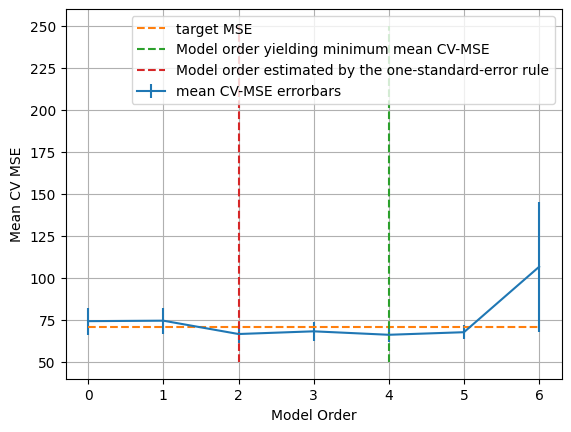

In [11]:
#TODO
target=[]
for i in range(nd):
  target+=[MSEcv_tgt]
target
plt.errorbar(dtest,MSEcv_mean,yerr=MSEcv_se,fmt='-',label='mean CV-MSE errorbars')
plt.xlabel('Model Order')
plt.ylabel('Mean CV MSE')
plt.plot(dtest,target,'--',label='target MSE')
plt.plot([dtest[imin],dtest[imin]],[50,250],'--',label='Model order yielding minimum mean CV-MSE')
plt.plot([dose,dose],[50,250],'--',label='Model order estimated by the one-standard-error rule')
plt.legend(loc='upper right')
plt.grid()

Finally, make a scatter plot of the data and superimpose
* the polynomial prediction curve with the order that minimizes mean CV-MSE
* the polynomial prediction curve with the order selected by the one-standard-error rule

As usual, add grid lines, axis labels, and a legend to your plot.

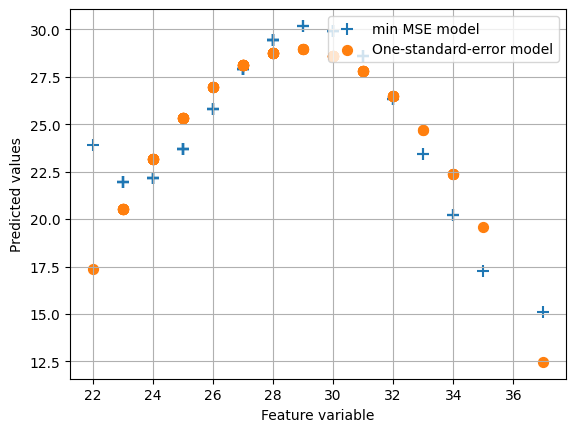

In [12]:
#TODO
beta1=poly.polyfit(x,y,dtest[imin])
beta2=poly.polyfit(x,y,dose)
yp_hat1=poly.polyval(x,beta1)
yp_hat2=poly.polyval(x,beta2)
plt.scatter(x,yp_hat1,label='min MSE model',marker='+',s=80)
plt.scatter(x,yp_hat2,label='One-standard-error model',marker='o',s=50)
plt.ylabel('Predicted values')
plt.xlabel('Feature variable')
plt.legend(loc='upper right')
plt.grid()

Note that because the shuffling done by the K-fold object is random, the results may vary a bit every time you run the code.  Although that can be avoided by setting the `random_seed` of the K-fold object, you generally don't want to overfit to what happens at a particular shuffling because that behavior may not hold for unseen test samples.

The model order that minimizes mean CV-MSE is 4
The model order estimated by the one-standard-error rule is 2


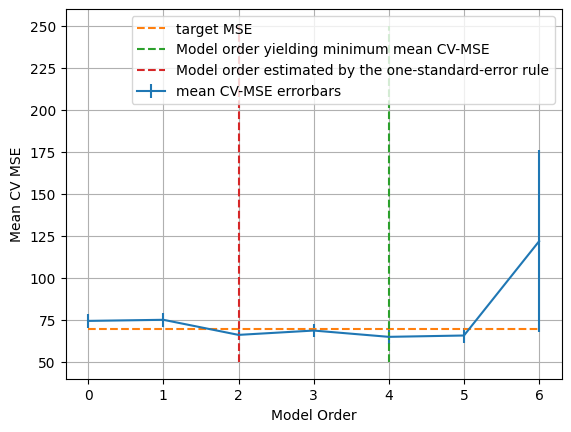

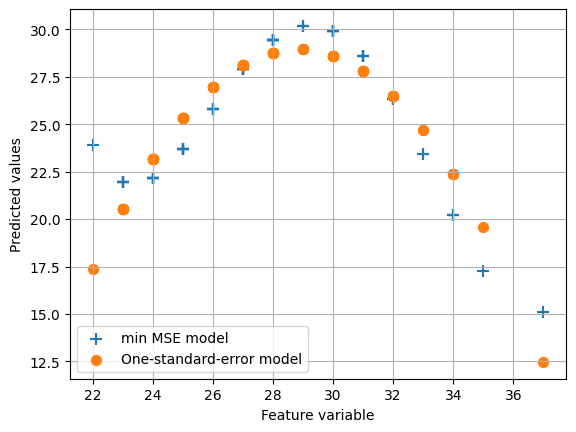

In [14]:
#I have written below code fixing the random seed of 15

from sklearn import model_selection
# TODO
#Create a k-fold object
k = 10
kfo = model_selection.KFold(n_splits=k,shuffle=True,random_state=15)
#Try model orders d between 0 and 7
dtest = np.arange(0,7)
nd = len(dtest)
MSEcv = np.zeros((nd,k))
#Loop over the folds
    #Get the training data in the split
    #Loop over the model order
        #Fit data on training folds
        #Measure MSE on test fold
        #MSEcv[it,itsplit] =
for isplit, ind in enumerate(kfo.split(x)):

  Itr, Its = ind
  xtrain = x[Itr]
  ytrain = y[Itr]
  xtest = x[Its]
  ytest = y[Its]
  for it, d in enumerate(dtest):
    beta_hat = poly.polyfit(xtrain,ytrain,d)
    yhat = poly.polyval(xtest,beta_hat)
    MSEcv[it,isplit] = np.mean((yhat-ytest)**2)

# TODO
MSEcv_mean = np.mean(MSEcv,axis=1)
MSEcv_se = np.std(MSEcv,axis=1,ddof=1)/np.sqrt(k)
imin = np.argmin(MSEcv_mean)
print("The model order that minimizes mean CV-MSE is {0:d}".format(dtest[imin]))
# Target MSE
MSEcv_tgt = MSEcv_mean[imin] + MSEcv_se[imin]

# Model order below target
I = np.where(MSEcv_mean <= MSEcv_tgt)[0]
iose = I[0]
dose = dtest[iose]
print("The model order estimated by the one-standard-error rule is", dose)

#TODO
target=[]
for i in range(nd):
  target+=[MSEcv_tgt]
target
plt.errorbar(dtest,MSEcv_mean,yerr=MSEcv_se,fmt='-',label='mean CV-MSE errorbars')
plt.xlabel('Model Order')
plt.ylabel('Mean CV MSE')
plt.plot(dtest,target,'--',label='target MSE')
plt.plot([dtest[imin],dtest[imin]],[50,250],'--',label='Model order yielding minimum mean CV-MSE')
plt.plot([dose,dose],[50,250],'--',label='Model order estimated by the one-standard-error rule')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#TODO
beta1=poly.polyfit(x,y,dtest[imin])
beta2=poly.polyfit(x,y,dose)
yp_hat1=poly.polyval(x,beta1)
yp_hat2=poly.polyval(x,beta2)
plt.scatter(x,yp_hat1,label='min MSE model',marker='+',s=80)
plt.scatter(x,yp_hat2,label='One-standard-error model',marker='o',s=50)
plt.ylabel('Predicted values')
plt.xlabel('Feature variable')
plt.legend()
plt.grid()
plt.show()